# Preprocessing and Modeling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [2]:
#!pip install yfinance
#!pip install pmdarima
#!pip install python-dateutil --upgrade
!pip3 install python-dateutil

Import Data

In [3]:
# importing the yfinance package
import yfinance as yf

# giving the start and end dates
startDate = '2021-01-01'
endDate = '2023-12-31'

# set stock names and create dict
tech = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']
cars = ['TSLA', 'F', 'GM', 'TM', 'RACE']
health = ['PFE', 'JNJ', 'CVS', 'UNH', 'LLY']
finance = ['BAC', 'C', 'WFC', 'JPM', 'USB']
games = ['AMD', 'GME', 'NVDA', 'EA', 'RBLX']
companies = tech + cars + health + finance + games
stockData = {}

for name in companies:
    # downloading the data of the ticker value between
    # the start and end dates
    resultData = yf.download(name, startDate, endDate)
    # store data in dict
    stockData[name] = resultData.reset_index()

stockData['META'].head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
1,2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2,2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
3,2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
4,2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


We know the data has the correct dtypes as well as no null values from our previous file.

We are only concerned mainly with the close price so let's seperate that column.

In [4]:
stockDataClose = {}

for stock in stockData:
    stockDataClose[stock] = stockData[stock][['Date', 'Close']]
    
stockDataClose['META'].head()

,Date,Close
0,2021-01-04,268.940002
1,2021-01-05,270.970001
2,2021-01-06,263.309998
3,2021-01-07,268.739990
4,2021-01-08,267.570007


We can run an Auto ARIMA function on every stock to first, find stationarity on our stock, and then make a prediction.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4509.726, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4505.960, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4507.854, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4507.858, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4503.995, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.542 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3269.468, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3266.106, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3268.085, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3268.082, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3264.516, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.714 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3454.113, Time=0.12 sec


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3450.114, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3452.113, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3452.113, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3448.157, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.376 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5242.673, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5244.094, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5245.153, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5245.110, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5242.152, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.671 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3035.738, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3034.980, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3036.865, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3036.859, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3033.590, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.669 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4965.140, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4963.567, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4963.848, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4963.903, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4961.568, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.491 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=700.356, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=697.726, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=698.776, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=698.763, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=695.830, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.667 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2094.605, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2090.865, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2092.628, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2092.621, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2088.976, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.439 seconds


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3140.047, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3137.098, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3138.059, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3138.070, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3135.295, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.345 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3729.265, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3726.046, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3727.500, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3727.484, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3724.627, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.466 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1540.958, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1536.994, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1538.969, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1538.968, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1535.016, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.627 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2655.670, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2653.329, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2654.372, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2654.412, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2651.334, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.489 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2329.241, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2326.651, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2327.402, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2327.463, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2324.660, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.387 seconds


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4457.782, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4454.580, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4456.007, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4456.020, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4453.029, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.442 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4256.290, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4253.264, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4255.230, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4255.231, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4259.844, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.623 seconds


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1338.691, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1338.045, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1336.694, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.704, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1336.097, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.342 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1920.643, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1919.688, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1921.393, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1921.443, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1918.560, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.401 seconds


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1778.600, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1775.904, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1777.650, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1777.668, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1774.055, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.504 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2956.446, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2954.549, Time=0.02 sec


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2954.456, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2954.488, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2952.584, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.336 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1802.505, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1799.078, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1800.864, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1800.870, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1797.375, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.728 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3508.285, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3505.075, Time=0.03 sec


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3506.825, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3506.802, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3503.090, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.326 seconds
Performing stepwise search to minimize aic


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\matth\AppData\Local\Temp\ipykernel_30932\1722708025.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15, 5))


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3786.340, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3810.151, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3785.667, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3790.298, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3808.166, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3784.067, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3771.907, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3748.272, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=3743.322, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3743.245, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3741.295, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3762.211, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3760.211, Time=0.65 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=3744.767, Time=1.25 sec
 ARIMA(4,1,1)(0

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4728.754, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4725.294, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4727.201, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4727.195, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4725.556, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.571 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2866.836, Time=0.13 sec


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2866.159, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2865.253, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2865.097, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2864.293, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.362 seconds


C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3270.699, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3279.003, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3270.204, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3269.001, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3277.315, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3270.315, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3267.226, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3262.610, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3265.590, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3256.335, Time=0.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3266.633, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3270.193, Time=0.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3258.191, Time=1.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3256.190, Time=0.78 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


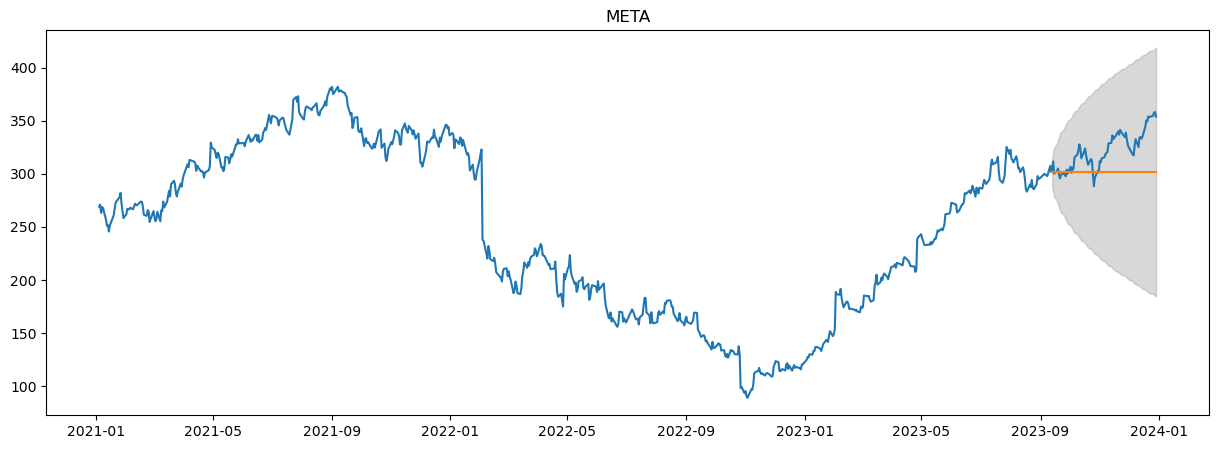

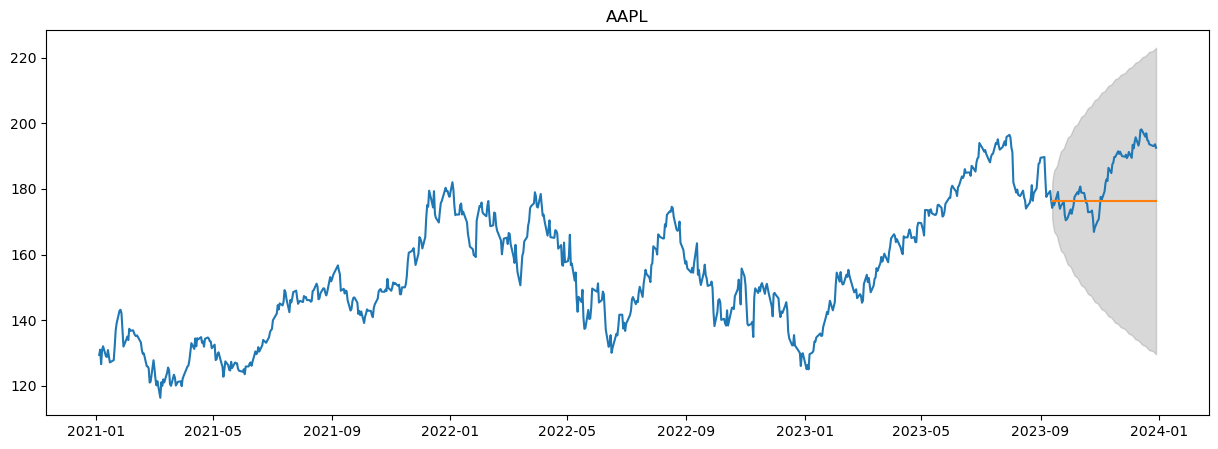

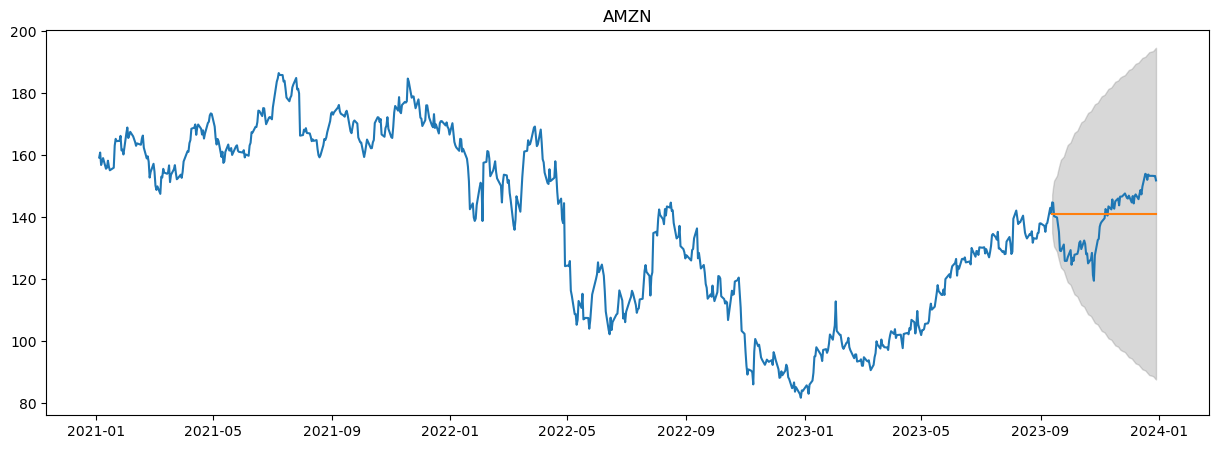

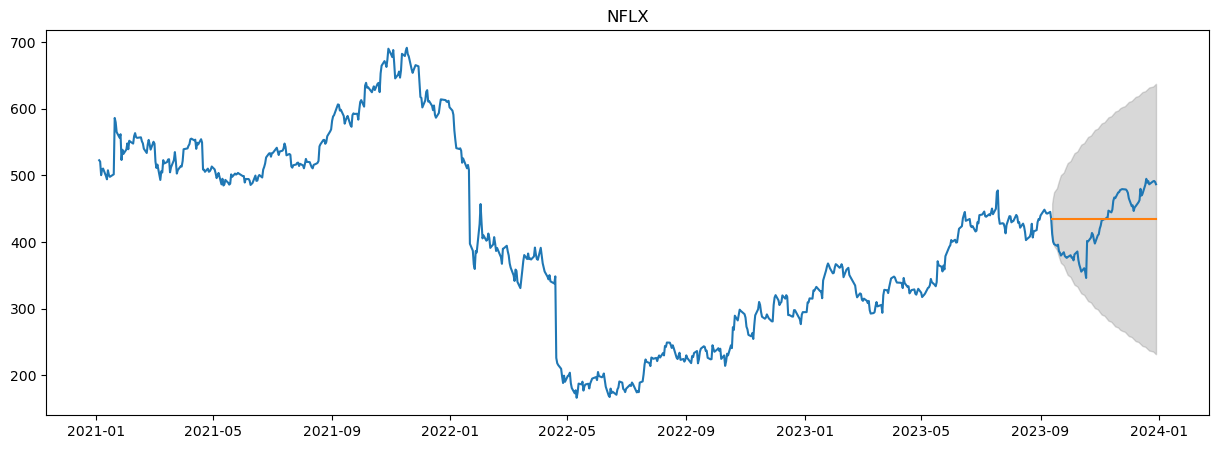

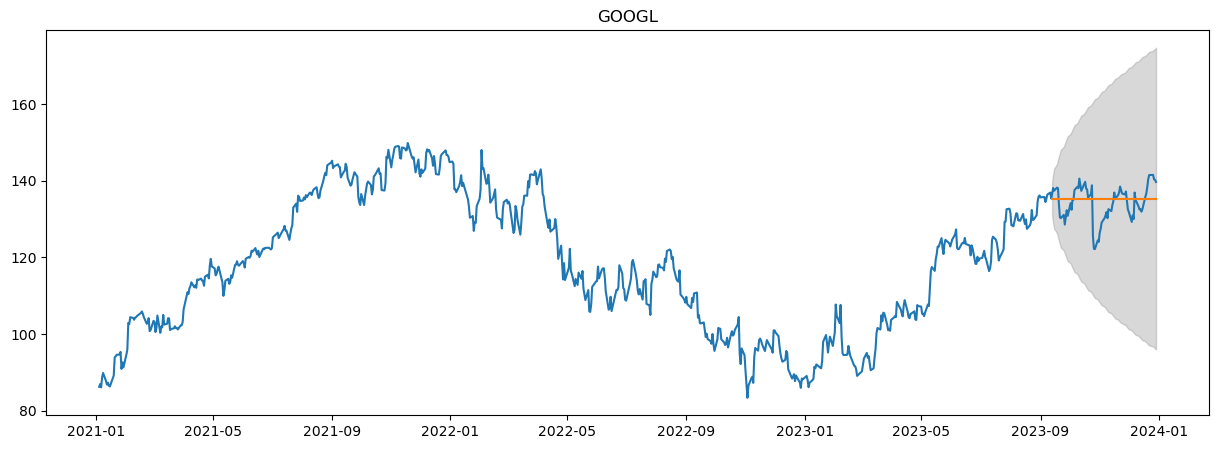

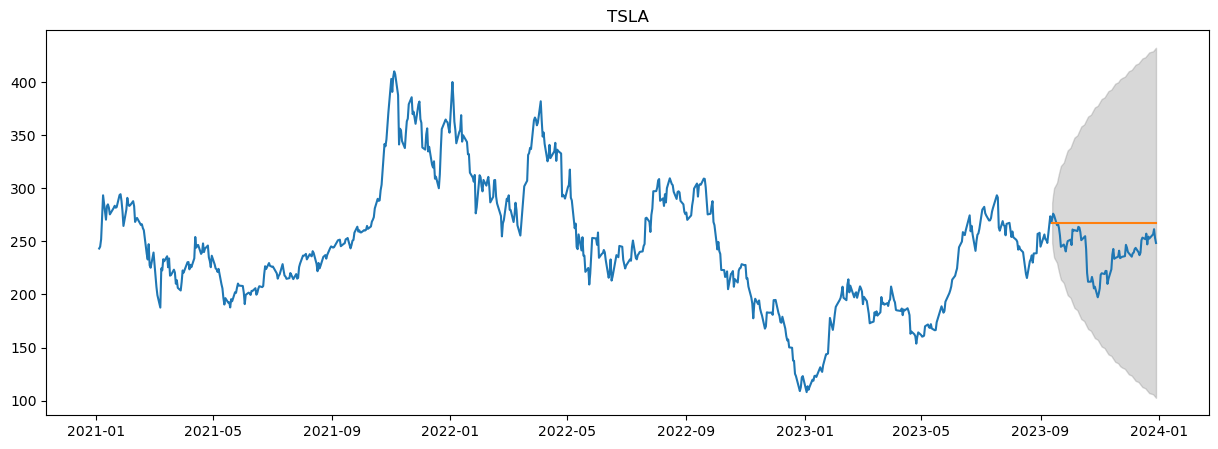

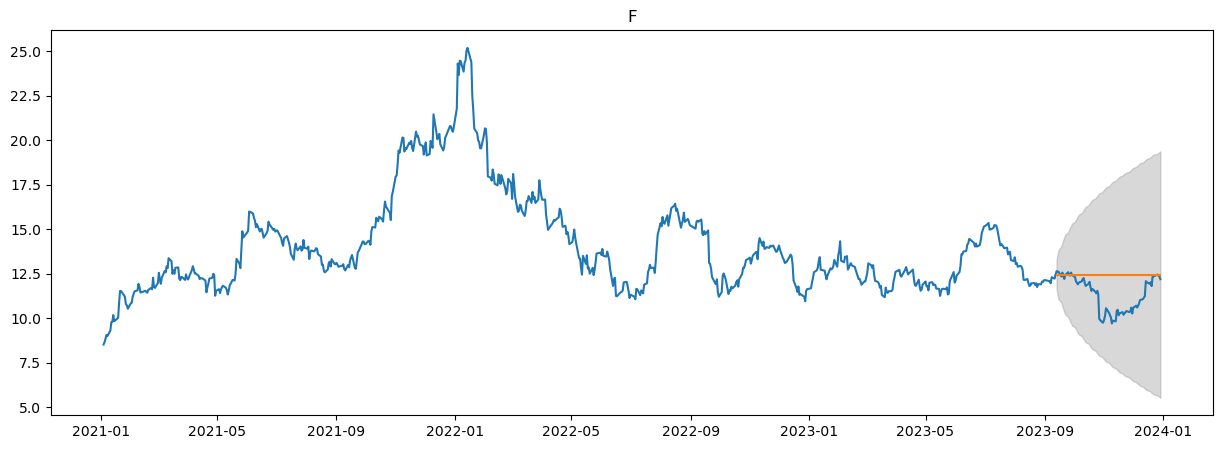

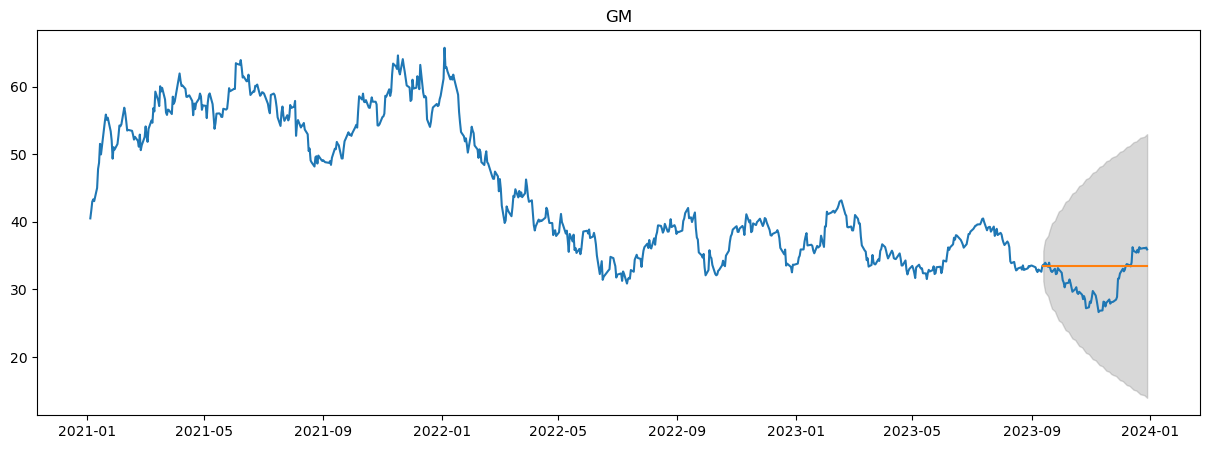

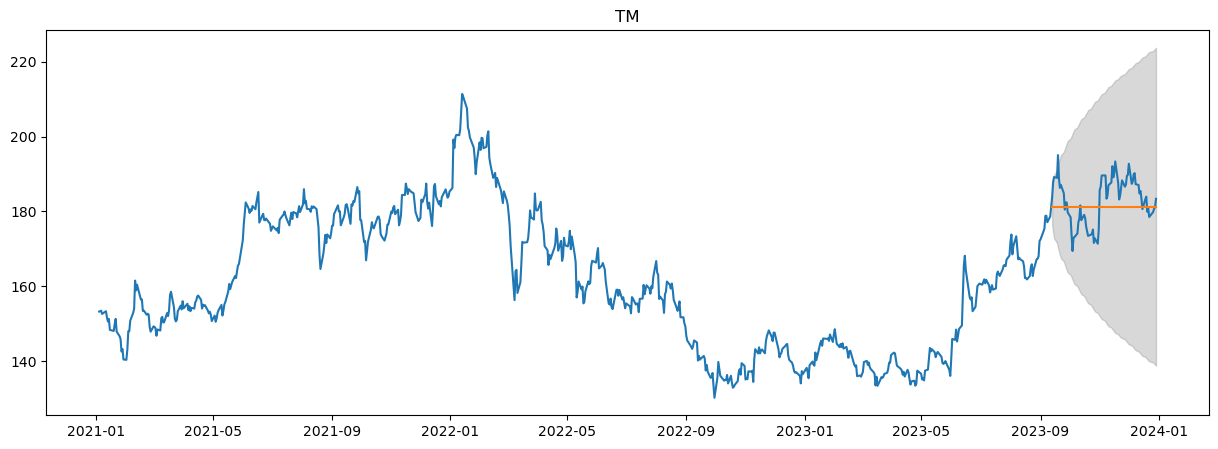

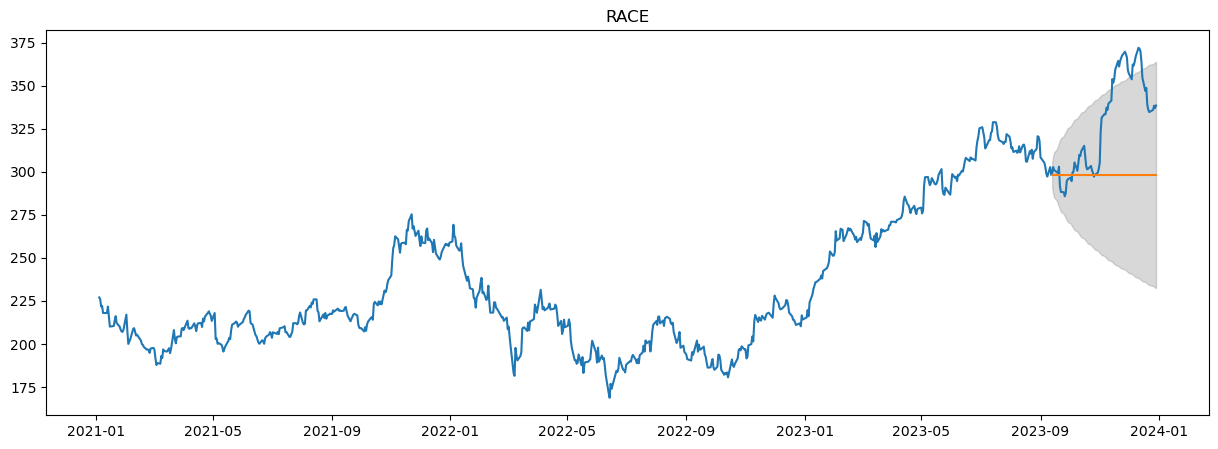

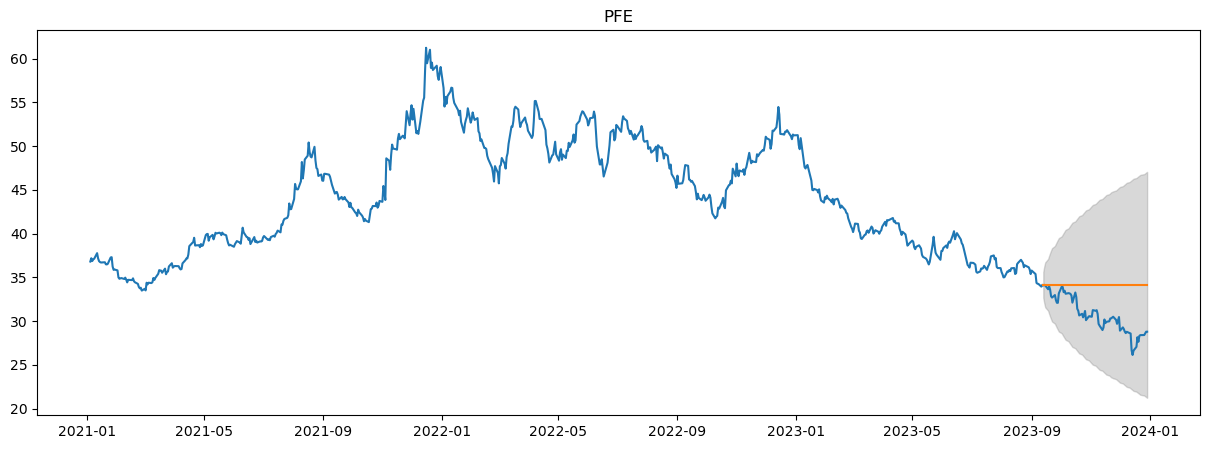

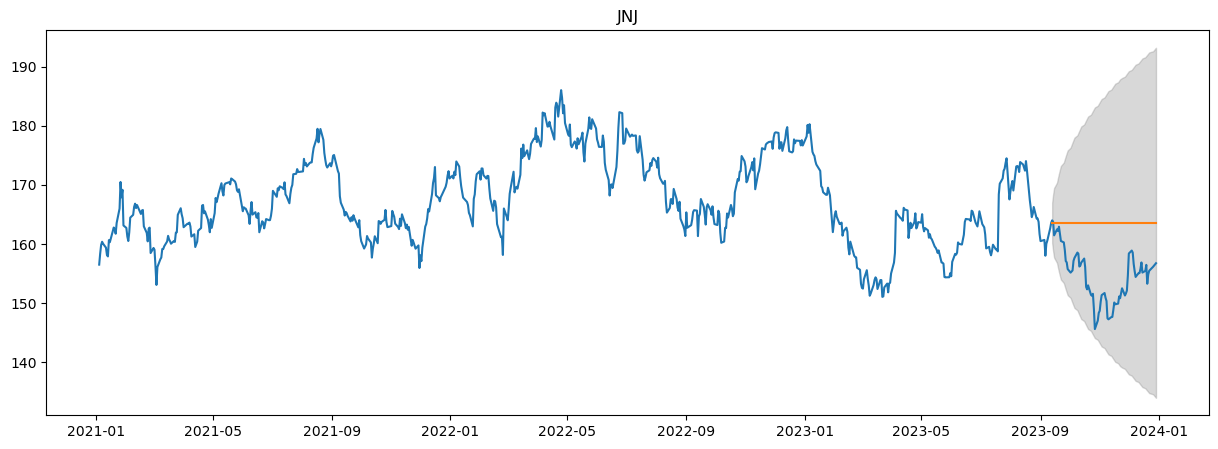

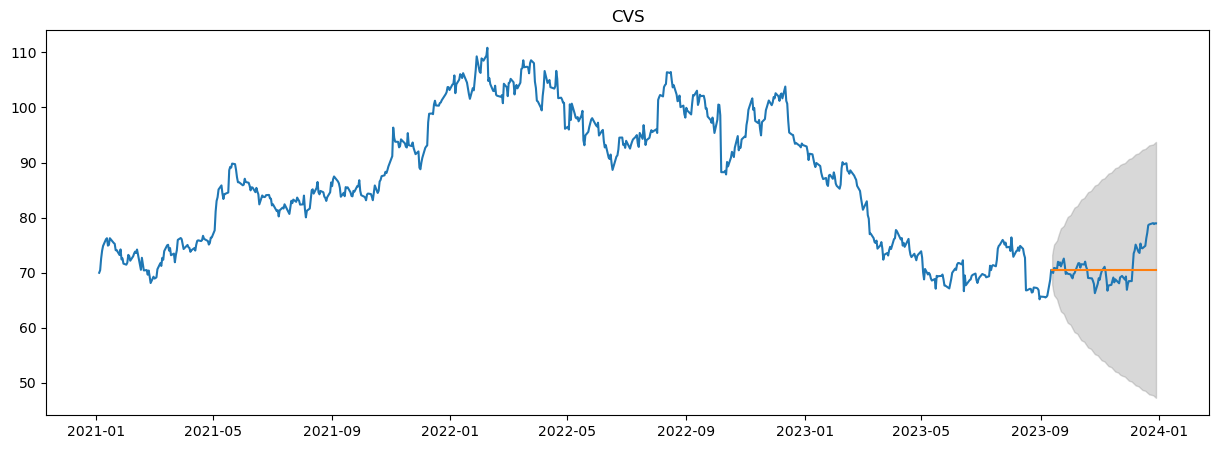

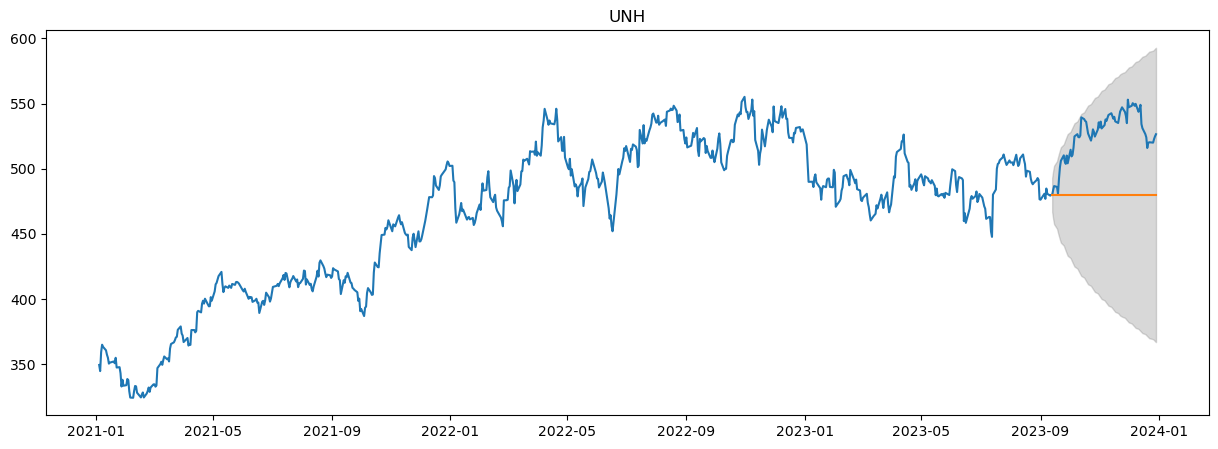

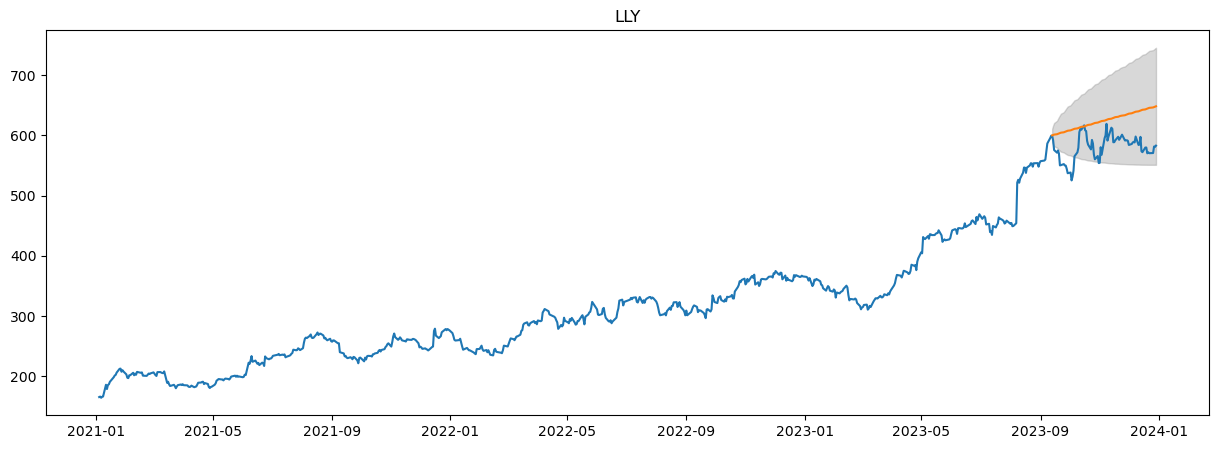

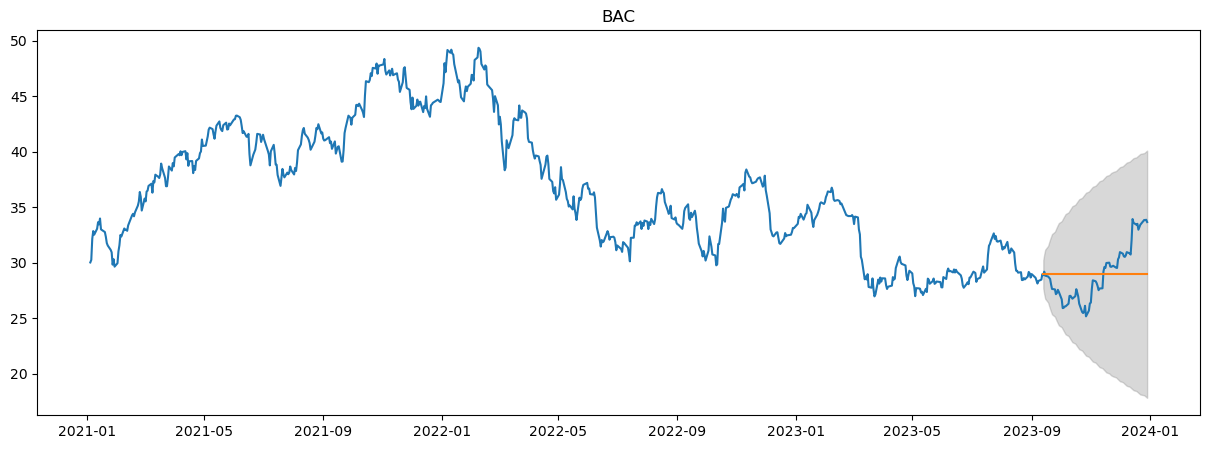

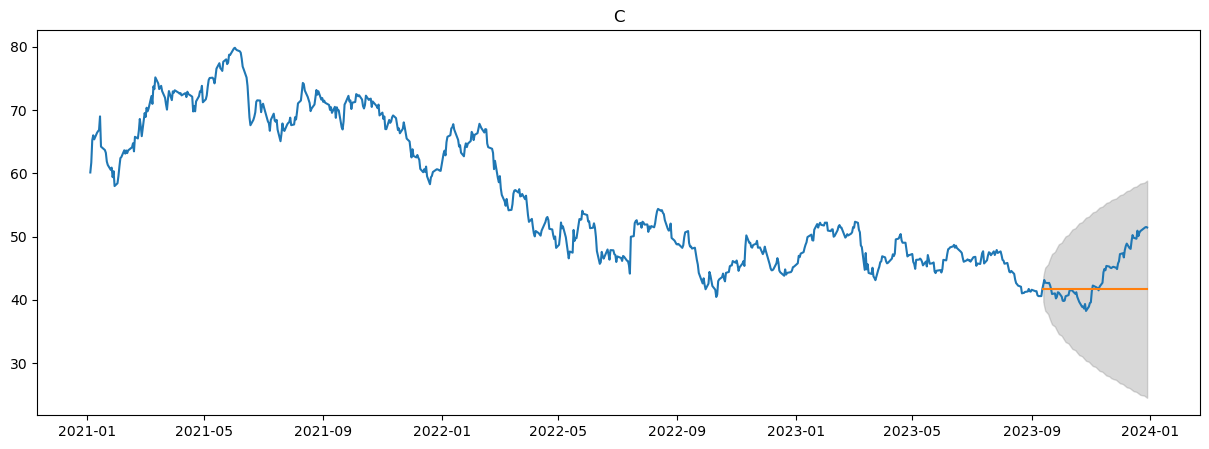

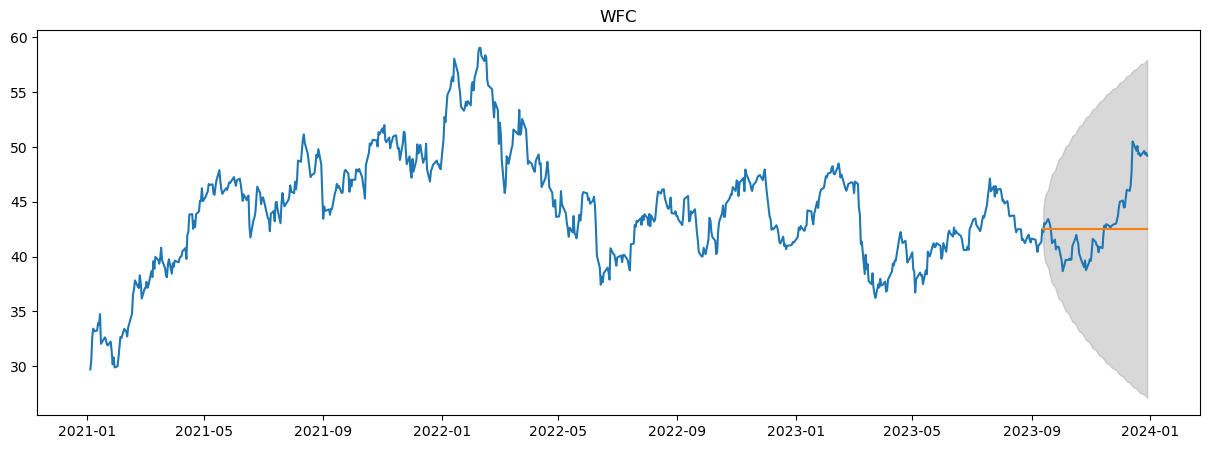

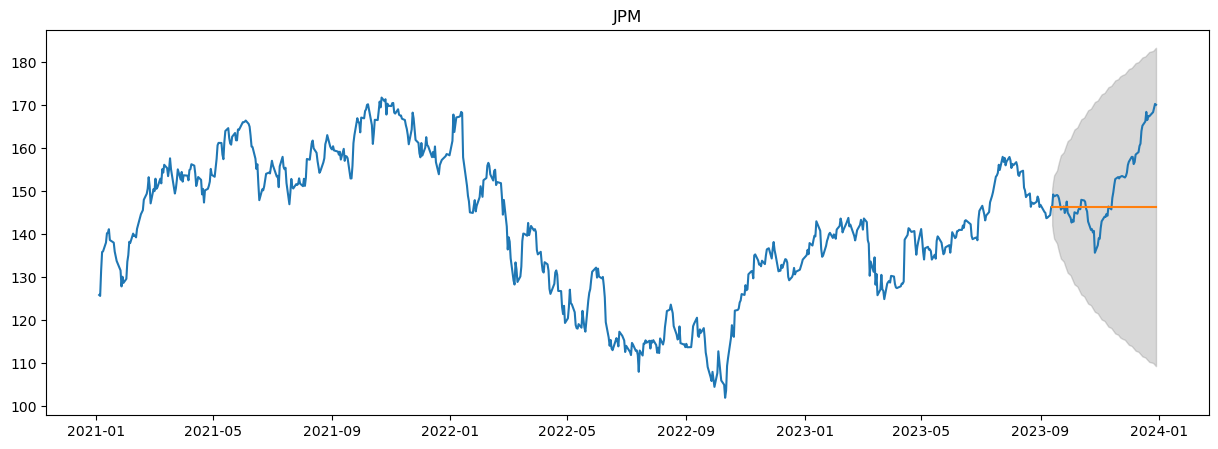

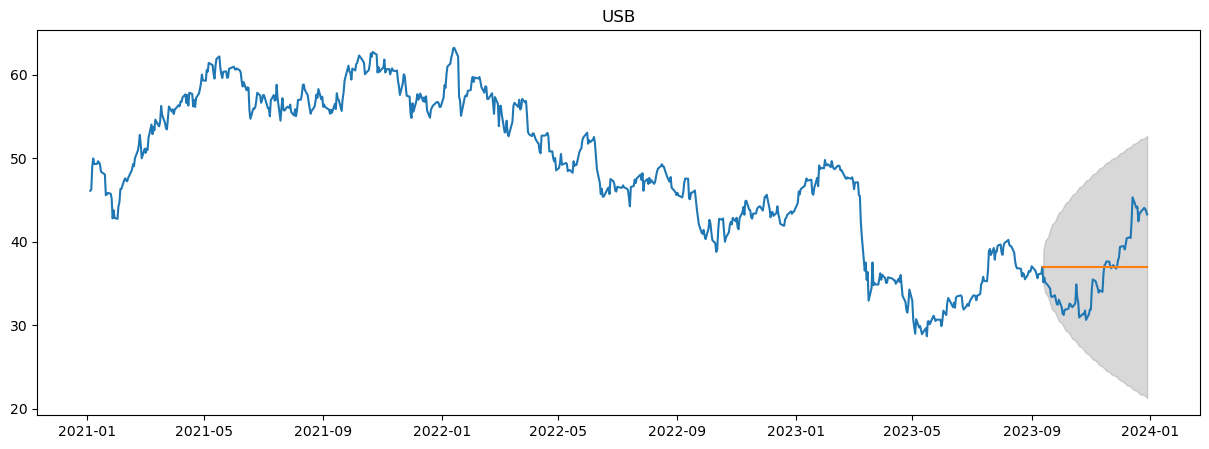

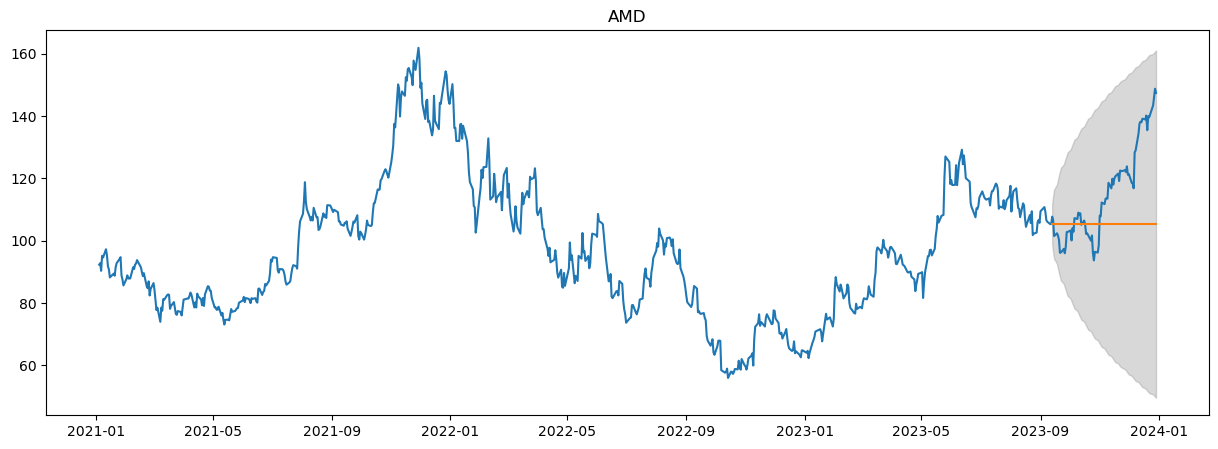

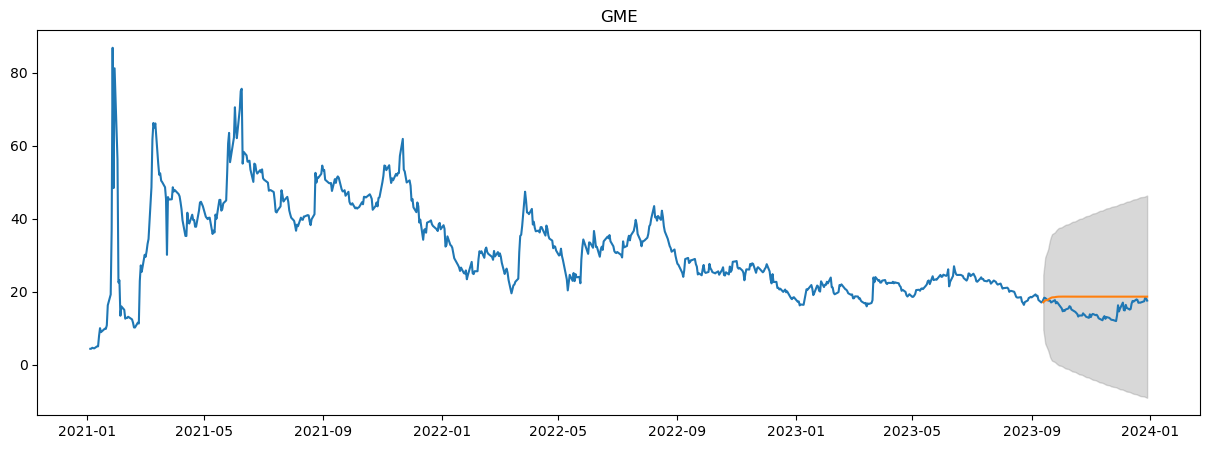

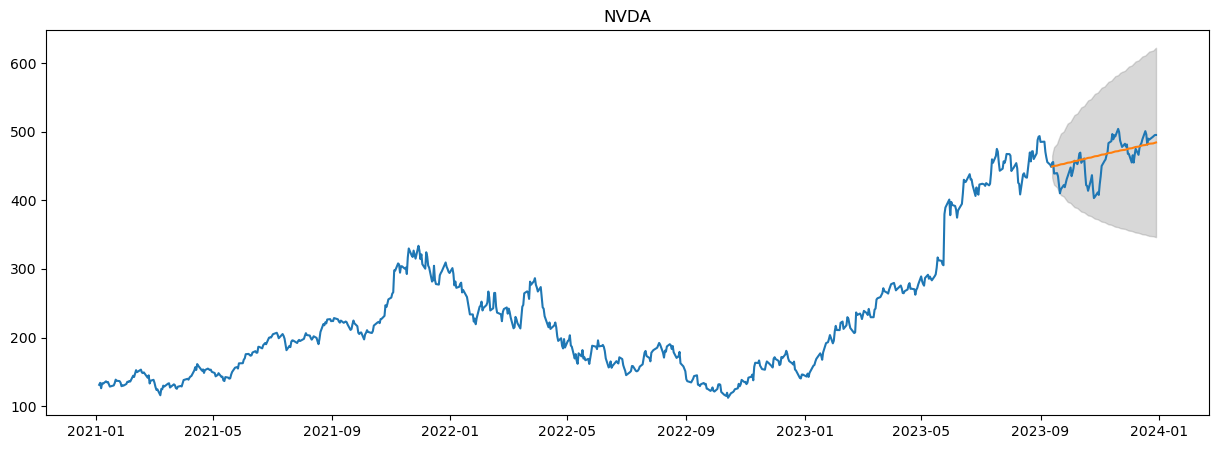

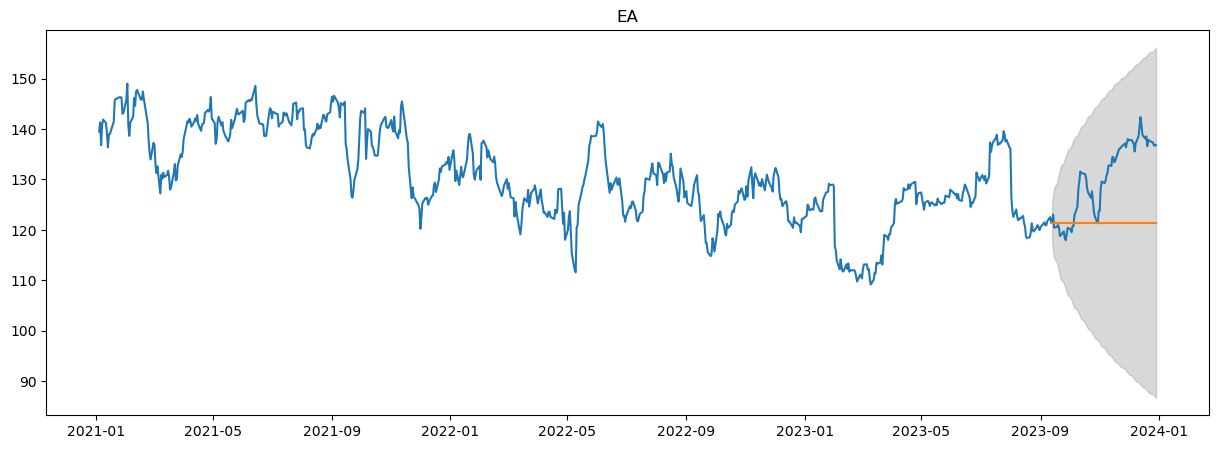

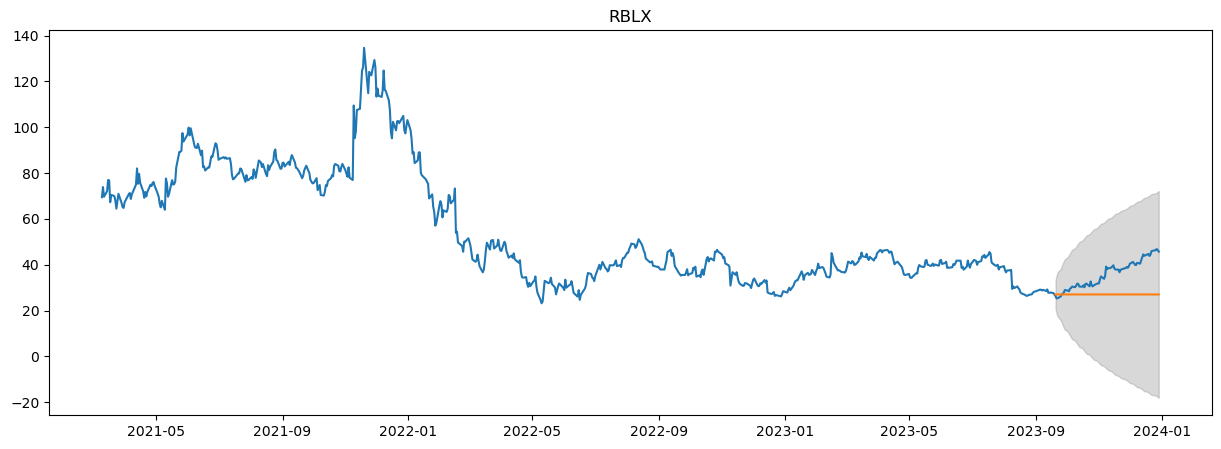

In [12]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima


for stock in stockDataClose:
    chosen = stockDataClose[stock]
    chosen = chosen.set_index('Date')
    train_data, test_data = chosen[3:int(len(chosen)*0.9)], chosen[int(len(chosen)*0.9):]
    
    model = auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    p,d,q = model.order
    prediction, confint = model.predict(n_periods=test_data.shape[0], return_conf_int=True)
    cf= pd.DataFrame(confint)
    
    prediction_series = pd.Series(prediction.values,index=test_data.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(chosen['Close'])
    ax.plot(prediction_series)
    ax.set_title(stock)
    ax.fill_between(prediction_series.index,
                    cf[0],
                    cf[1],color='grey',alpha=.3)
    
    
    

## Conclusion

Many of stocks were not easy to predict. We need to fine tune our model as auto ARIMA was not able to find a pattern.